#  Movie Rating Predictor

This mini-project predicts movie ratings using user and item data from the dataset.  
It involves data preprocessing, merging user and movie features, training a machine learning model, and generating predicted ratings.

**Key Concepts:** Feature engineering, Regression, Train/Test pipeline  
**Tech Stack:** Python, Pandas, Scikit-learn, NumPy  
**Output:** `submission.csv` – predicted ratings for the test dataset


## Workflow
1. Load and explore data  
2. Preprocess users, items, and genre data  
3. Merge datasets into a unified feature table  
4. Train a regression model (e.g., RandomForestRegressor)  
5. Predict test ratings and save to CSV


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [ ]:

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
users = pd.read_csv('user.csv')
items = pd.read_csv('item.csv')
print("train, test, users, items shapes:", train.shape, test.shape, users.shape, items.shape)


train, test, users, items shapes: (90570, 4) (9430, 3) (943, 5) (1682, 23)


In [ ]:

print("Train sample:")
display(train.head())
print("Users sample:")
display(users.head())
print("Items sample:")
display(items.head())


Train sample:


,timestamp,user_id,item_id,rating
0,874965758,1,1,5
1,876893171,1,2,3
2,878542960,1,3,4
3,876893119,1,4,3
4,889751712,1,5,3


Users sample:


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Items sample:


,movie_id,title,release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0.0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0


In [ ]:
items.isnull().sum()

movie_id         0
 title           0
 release_date    1
 imdb_url        2
unknown          0
Action           0
Adventure        0
Animation        0
Children's       0
Comedy           0
Crime            0
Documentary      0
Drama            0
Fantasy          0
Film-Noir        0
Horror           0
Musical          0
Mystery          0
Romance          0
Sci-Fi           0
Thriller         0
War              0
Western          1
dtype: int64

In [ ]:
users.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [ ]:
train.isnull().sum()

timestamp    0
user_id      0
item_id      0
rating       0
dtype: int64

In [ ]:
#  Cleaning column names and extracting release year

#prevent leading and trailing spaces
items.columns = items.columns.str.strip()
users.columns = users.columns.str.strip()

#movie_id is same as item_id
if 'movie_id' in items.columns and 'item_id' not in items.columns:
    items = items.rename(columns={'movie_id':'item_id'})


items.head()


,item_id,title,release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0.0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0


In [ ]:
#making a new column named release_year by extracting last 4 digits of release_date
if 'release_date' in items.columns:
    items['release_year'] = items['release_date'].astype(str).str[-4:]
else:
    items['release_year'] = None

items.head(2)

,item_id,title,release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0.0,1995
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0.0,1995


In [ ]:
items.isnull().sum()

item_id         0
title           0
release_date    1
imdb_url        2
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         1
release_year    0
dtype: int64

In [ ]:
#release_year has 0 null values
# convert to numeric (non-numeric becomes NaN)
items['release_year'] = pd.to_numeric(items['release_year'], errors='coerce')

In [ ]:
display(items['release_year'].head())

0    1995.0
1    1995.0
2    1995.0
3    1995.0
4    1995.0
Name: release_year, dtype: float64

In [ ]:
# Fill missing years with median release_year
items['release_year'] = items['release_year'].fillna(items['release_year'].median())

items.isnull().sum()

item_id         0
title           0
release_date    1
imdb_url        2
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         1
release_year    0
dtype: int64

In [ ]:
# Detect & clean genre columns 
exclude = {'item_id','title','release_date','imdb_url','release_year'}
genre_cols = [c for c in items.columns if c not in exclude]
print('Detected genre columns:', genre_cols)
for g in genre_cols:
    items[g] = pd.to_numeric(items[g], errors='coerce').fillna(0).astype(int) 
# for loop coerces each genre column to numeric, fills missing with 0, and converts to integer type.


Detected genre columns: ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [ ]:
# Merge train with user and item info
df = train.merge(users, on='user_id', how='left').merge(items, on='item_id', how='left')
print('Merged df shape:', df.shape)
display(df.head())


Merged df shape: (90570, 31)


,timestamp,user_id,item_id,rating,age,gender,occupation,zip_code,title,release_date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,874965758,1,1,5,24,M,technician,85711,Toy Story (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,1995.0
1,876893171,1,2,3,24,M,technician,85711,GoldenEye (1995),01-Jan-1995,...,0,0,0,0,0,0,1,0,0,1995.0
2,878542960,1,3,4,24,M,technician,85711,Four Rooms (1995),01-Jan-1995,...,0,0,0,0,0,0,1,0,0,1995.0
3,876893119,1,4,3,24,M,technician,85711,Get Shorty (1995),01-Jan-1995,...,0,0,0,0,0,0,0,0,0,1995.0
4,889751712,1,5,3,24,M,technician,85711,Copycat (1995),01-Jan-1995,...,0,0,0,0,0,0,1,0,0,1995.0


In [ ]:
df.shape

(90570, 31)

In [ ]:
# Build simple features (user_mean, item_mean, release_year, genres)
df['user_mean'] = df.groupby('user_id')['rating'].transform('mean')#avg rating per user
df['item_mean'] = df.groupby('item_id')['rating'].transform('mean')#avg rating per movie

if 'release_year' in df.columns:
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
    df['release_year'] = df['release_year'].fillna(df['release_year'].median())#missing values are filled with meadian year
else:
    df['release_year'] = df['release_year'].median()
    
for g in genre_cols:
    if g not in df.columns:
        df[g] = 0
    df[g] = df[g].fillna(0).astype(int)
    
df['gender'] = df.get('gender', 'U').fillna('U')
df['occupation'] = df.get('occupation', 'unknown').fillna('unknown')

# VECTORIZATION STEP
# Here we include each genre column (19 of them) as one feature.
# This means each movie is represented as a vector of 0/1 values across genres.
# Example: [Action=1, Comedy=0, Drama=1, ...]
feature_cols = ['user_mean', 'item_mean', 'release_year'] + genre_cols
print('Number of features:', len(feature_cols))


Number of features: 22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90570 entries, 0 to 90569
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     90570 non-null  int64  
 1   user_id       90570 non-null  int64  
 2   item_id       90570 non-null  int64  
 3   rating        90570 non-null  int64  
 4   age           90570 non-null  int64  
 5   gender        90570 non-null  object 
 6   occupation    90570 non-null  object 
 7   zip_code      90570 non-null  object 
 8   title         90570 non-null  object 
 9   release_date  90562 non-null  object 
 10  imdb_url      90566 non-null  object 
 11  unknown       90570 non-null  int32  
 12  Action        90570 non-null  int32  
 13  Adventure     90570 non-null  int32  
 14  Animation     90570 non-null  int32  
 15  Children's    90570 non-null  int32  
 16  Comedy        90570 non-null  int32  
 17  Crime         90570 non-null  int32  
 18  Documentary   90570 non-nu

In [ ]:
df.isnull().sum()

timestamp       0
user_id         0
item_id         0
rating          0
age             0
gender          0
occupation      0
zip_code        0
title           0
release_date    8
imdb_url        4
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
release_year    0
user_mean       0
item_mean       0
dtype: int64

In [ ]:
#every missing value has handled

In [ ]:
# Make X and y; one-hot encode gender & occupation
cat = df[['gender','occupation']]
#df doesn't contain missing values
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(cat)
cat_ohe = pd.DataFrame(ohe.transform(cat), index=df.index, columns=ohe.get_feature_names_out())
#convert the transformed numpy array back into a DataFrame with appropriate column names and indices matching df.


In [ ]:
cat_ohe.head()

,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = pd.concat([df[feature_cols].reset_index(drop=True), cat_ohe.reset_index(drop=True)], axis=1)
y = df['rating'].astype(float)
X.shape


(90570, 45)

In [ ]:
y.shape
#target variable 1 col should be there

(90570,)

In [ ]:
X.head()

,user_mean,item_mean,release_year,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,3.603053,3.859694,1995.0,0,0,0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.603053,3.198347,1995.0,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.603053,3.058824,1995.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.603053,3.545455,1995.0,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.603053,3.291139,1995.0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y.head()

0    5.0
1    3.0
2    4.0
3    3.0
4    3.0
Name: rating, dtype: float64

In [ ]:
# Train / validation split (80/20)
X_train, X_val, y_train, y_val, idx_train, idx_val = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42)
print('Train shape:', X_train.shape, 'Val shape:', X_val.shape)


Train shape: (72456, 45) Val shape: (18114, 45)


In [ ]:
#  Baseline
# Global mean rating
global_mean = y_train.mean()
print('Global mean:', global_mean)

#  User mean ratings (how much each user rates on average)
user_mean = df.loc[idx_train].groupby('user_id')['rating'].mean()

# Item mean ratings (how much each movie is rated on average)
item_mean = df.loc[idx_train].groupby('item_id')['rating'].mean()

#  Make predictions for validation set
pred_bias = []
for i in idx_val:   # go row by row in validation set
    row = df.loc[i]
    u = row['user_id']
    it = row['item_id']
    
    # start from global mean
    pred = global_mean
    
    # add user effect if available
    if u in user_mean:
        pred = user_mean[u]
    
    # if user mean not available, try item mean
    if it in item_mean:
        pred = item_mean[it]
    
    # clip prediction to [1,5]
    pred = np.clip(pred, 1.0, 5.0)
    
    pred_bias.append(pred)

# Compute MSE
mse_bias = mean_squared_error(y_val, pred_bias)
print("Bias model MSE:", mse_bias)


Global mean: 3.520578005962239
Bias model MSE: 1.049441448334809


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = np.clip(lr.predict(X_val), 1.0, 5.0)
mse_lr = mean_squared_error(y_val, y_pred_lr)
print('Linear Regression MSE:', mse_lr)


Linear Regression MSE: 0.8557424917643234


In [ ]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = np.clip(rf.predict(X_val), 1.0, 5.0)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print('Random Forest MSE:', mse_rf)


Random Forest MSE: 0.8468405739300743


In [ ]:
#  Compare models & choose best
# Global mean baseline MSE
y_val_global = np.full(len(y_val), global_mean)
mse_global = mean_squared_error(y_val, y_val_global)
# Collect all results
results = pd.DataFrame({
    'model': ['global_mean', 'user_item_bias', 'linear_regression', 'random_forest'],
    'mse': [mse_global, mse_bias, mse_lr, mse_rf]
}).sort_values('mse').reset_index(drop=True)

display(results)
best_model = results.loc[0, 'model']
print('Best model on validation:', best_model)


,model,mse
0,random_forest,0.846841
1,linear_regression,0.855742
2,user_item_bias,1.049441
3,global_mean,1.272315


Best model on validation: random_forest


In [ ]:
#  Merge test with users and items so every test row has movie + user info
test_merged = test.merge(users, on='user_id', how='left').merge(items, on='item_id', how='left')


print("test rows:", test.shape[0])
print("merged rows:", test_merged.shape[0])
display(test_merged.head())


test rows: 9430
merged rows: 9430


,id,user_id,item_id,age,gender,occupation,zip_code,title,release_date,imdb_url,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,1,20,24,M,technician,85711,Angels and Insects (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Angels%20and%...,...,0,0,0,0,1,0,0,0,0,1995.0
1,2,1,33,24,M,technician,85711,Desperado (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Desperado%20(...,...,0,0,0,0,1,0,1,0,0,1995.0
2,3,1,61,24,M,technician,85711,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...,...,0,0,0,0,0,0,0,0,0,1994.0
3,4,1,117,24,M,technician,85711,Rock; The (1996),07-Jun-1996,http://us.imdb.com/M/title-exact?Rock;%20The%2...,...,0,0,0,0,0,0,1,0,0,1996.0
4,5,1,155,24,M,technician,85711,Dirty Dancing (1987),01-Jan-1987,http://us.imdb.com/M/title-exact?Dirty%20Danci...,...,0,0,1,0,1,0,0,0,0,1987.0


In [ ]:
# Ensure every genre column exists and is clean numeric 0/1
for g in genre_cols:
    if g not in test_merged.columns:
        # If a genre column is missing entirely in the merged frame, create it filled with zeros
        test_merged[g] = 0
    # Convert any weird values to numeric, fill NaN with 0, then make integer
    test_merged[g] = pd.to_numeric(test_merged[g], errors='coerce').fillna(0).astype(int)

print("Genre values for first test row:")
display(test_merged.loc[test_merged.index[0], genre_cols])


Genre values for first test row:


unknown        0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          1
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        1
Sci-Fi         0
Thriller       0
War            0
Western        0
Name: 0, dtype: object

In [ ]:
user_mean_full = train.groupby('user_id')['rating'].mean().rename('user_mean')
item_mean_full = train.groupby('item_id')['rating'].mean().rename('item_mean')

In [ ]:
user_mean_full.head()

user_id
1    3.603053
2    3.750000
3    2.909091
4    4.357143
5    2.909091
Name: user_mean, dtype: float64

In [ ]:
user_mean_full.isnull().sum()

0

In [ ]:
item_mean_full.head()

item_id
1    3.859694
2    3.198347
3    3.058824
4    3.545455
5    3.291139
Name: item_mean, dtype: float64

In [ ]:
user_mean_full.isnull().sum()

0

In [ ]:
test_merged = test_merged.join(user_mean_full, on='user_id').join(item_mean_full, on='item_id')

In [ ]:
test_merged.head()

,id,user_id,item_id,age,gender,occupation,zip_code,title,release_date,imdb_url,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,user_mean,item_mean
0,1,1,20,24,M,technician,85711,Angels and Insects (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Angels%20and%...,...,0,0,1,0,0,0,0,1995.0,3.603053,3.344262
1,2,1,33,24,M,technician,85711,Desperado (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Desperado%20(...,...,0,0,1,0,1,0,0,1995.0,3.603053,3.460674
2,3,1,61,24,M,technician,85711,Three Colors: White (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Trzy%20kolory...,...,0,0,0,0,0,0,0,1994.0,3.603053,3.857143
3,4,1,117,24,M,technician,85711,Rock; The (1996),07-Jun-1996,http://us.imdb.com/M/title-exact?Rock;%20The%2...,...,0,0,0,0,1,0,0,1996.0,3.603053,3.690625
4,5,1,155,24,M,technician,85711,Dirty Dancing (1987),01-Jan-1987,http://us.imdb.com/M/title-exact?Dirty%20Danci...,...,1,0,1,0,0,0,0,1987.0,3.603053,3.093750


In [ ]:
test_merged.isnull().sum()

id              0
user_id         0
item_id         0
age             0
gender          0
occupation      0
zip_code        0
title           0
release_date    1
imdb_url        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
release_year    0
user_mean       0
item_mean       2
dtype: int64

In [ ]:
global_mean_full = train['rating'].mean()

test_merged['user_mean'] = test_merged['user_mean'].fillna(global_mean_full)
test_merged['item_mean'] = test_merged['item_mean'].fillna(global_mean_full)

In [ ]:
test_merged.isnull().sum()

id              0
user_id         0
item_id         0
age             0
gender          0
occupation      0
zip_code        0
title           0
release_date    1
imdb_url        0
unknown         0
Action          0
Adventure       0
Animation       0
Children's      0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
release_year    0
user_mean       0
item_mean       0
dtype: int64

In [ ]:
display(test_merged[['user_id','item_id','user_mean','item_mean']].head())

,user_id,item_id,user_mean,item_mean
0,1,20,3.603053,3.344262
1,1,33,3.603053,3.460674
2,1,61,3.603053,3.857143
3,1,117,3.603053,3.690625
4,1,155,3.603053,3.093750


In [ ]:

#  One-hot encode gender and occupation using the encoder we fitted on train (ohe)
cat_test = test_merged[['gender','occupation']].fillna('NA')
cat_ohe_test = pd.DataFrame(ohe.transform(cat_test), index=test_merged.index, columns=ohe.get_feature_names_out())

In [ ]:
cat_ohe_test.head()

,gender_F,gender_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#  Combine numeric features  with categorical one-hot columns
X_test = pd.concat([test_merged[feature_cols].reset_index(drop=True), cat_ohe_test.reset_index(drop=True)], axis=1)

In [ ]:
X_test.isnull().sum()

user_mean                   0
item_mean                   0
release_year                0
unknown                     0
Action                      0
Adventure                   0
Animation                   0
Children's                  0
Comedy                      0
Crime                       0
Documentary                 0
Drama                       0
Fantasy                     0
Film-Noir                   0
Horror                      0
Musical                     0
Mystery                     0
Romance                     0
Sci-Fi                      0
Thriller                    0
War                         0
Western                     0
gender_F                    0
gender_M                    0
occupation_administrator    0
occupation_artist           0
occupation_doctor           0
occupation_educator         0
occupation_engineer         0
occupation_entertainment    0
occupation_executive        0
occupation_healthcare       0
occupation_homemaker        0
occupation

In [ ]:
X_test.shape

(9430, 45)

In [ ]:
X_test.head()

,user_mean,item_mean,release_year,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,3.603053,3.344262,1995.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.603053,3.460674,1995.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.603053,3.857143,1994.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.603053,3.690625,1996.0,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.603053,3.093750,1987.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#  Select model and make raw predictions on X_test

print("Using best_model:", best_model)

if best_model == 'random_forest':
    # Random Forest was chosen
    raw_preds = rf.predict(X_test)
elif best_model == 'linear_regression':
    # Linear Regression was chosen
    raw_preds = lr.predict(X_test)
elif best_model == 'user_item_bias':
    # Simple bias-style prediction using user_mean_full and item_mean_full:
    # prefer user average if available, else item average, else global mean
    raw_preds = []
    for i in test_merged.index:
        r = test_merged.loc[i]
        u = r['user_id']
        it = r['item_id']
        if u in user_mean_full.index:
            p = user_mean_full.loc[u]
        elif it in item_mean_full.index:
            p = item_mean_full.loc[it]
        else:
            p = global_mean_full
        raw_preds.append(p)
    raw_preds = np.array(raw_preds)
else:
    # use the global mean from full train
    raw_preds = np.full(len(X_test), global_mean_full)

print("Made raw predictions for", len(raw_preds), "rows.")

    

Using best_model: random_forest
Made raw predictions for 9430 rows.


In [ ]:
#  Clip predictions to [1,5] and round to nearest integer

preds_clipped = np.clip(raw_preds, 1.0, 5.0)        # ensure valid range
preds_int = np.rint(preds_clipped).astype(int)      # round to nearest integer (1..5)


print("Min/Max after clipping:", preds_clipped.min(), preds_clipped.max())
print("Min/Max after rounding:", preds_int.min(), preds_int.max())
display(preds_int[:10])  


Min/Max after clipping: 1.0019003496720889 4.943653960848679
Min/Max after rounding: 1 5


array([3, 4, 4, 4, 3, 3, 4, 4, 4, 4])

In [ ]:
#  Create submission DataFrame and save it

submission = pd.DataFrame({
    'timestamp': np.arange(1, len(preds_int) + 1),   # 1,2,3,... in the same order as test.csv
    'rating': preds_int
})

out_path = 'Movie_rating_predictions.csv'
submission.to_csv(out_path, index=False)

print("Saved submission to:", out_path)
display(submission.head())


Saved submission to: Movie_rating_predictions.csv


,timestamp,rating
0,1,3
1,2,4
2,3,4
3,4,4
4,5,3


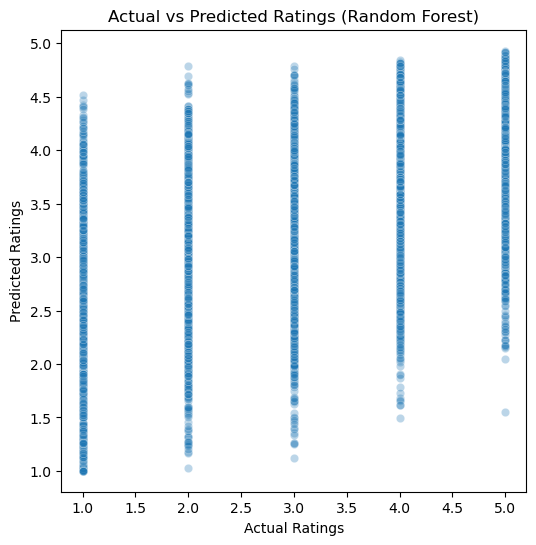

In [ ]:
# 6. Actual vs Predicted (for Random Forest)
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=rf.predict(X_val), alpha=0.3)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.show()


In [ ]:
# Example: Predict rating for a specific user-movie pair from dataset

X_sample = X_val.sample(1)
predicted_rating = np.clip(rf.predict(X_sample), 1.0, 5.0)
print(" Predicted Rating:", predicted_rating[0])



 Predicted Rating: 4.058516528389344
